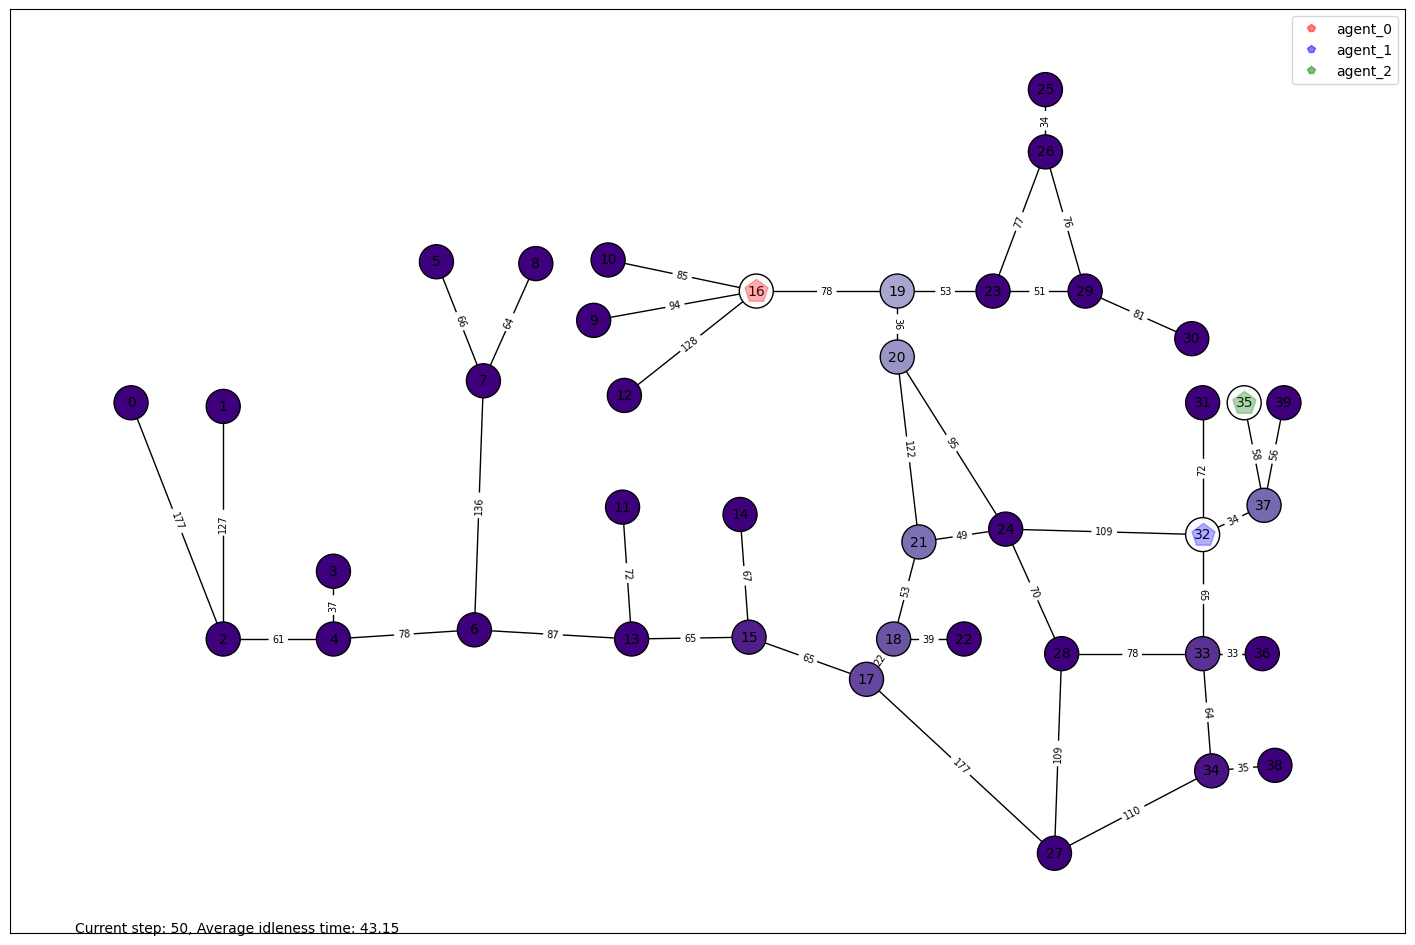

In [11]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 3,
                   observation_radius = 0,
                   comms_model = CommunicationModel("bernoulli"),
                   require_explicit_visit=False
)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    i += 1
    if i >= 50:
        break
env.close()

In [12]:
env.observe(env.agents[0])

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x21f01b129b0>: (28.275,
   26.25)},
 'vertex_state': {16: 0},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x21f01b129b0>: array([844, 667, 794, 606, 643, 528, 730, 664, 441, 728,  94,   0,  85,
         513, 128, 376, 443, 311,  78, 388, 289, 236, 328, 114, 131, 209,
         208, 182, 318, 279, 242, 421, 357, 263, 390, 352, 390, 456, 410,
         408])}}

In [36]:
env.observe_with_communication(env.agents[0])

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x21f01b129b0>: (28.275,
   26.25),
  <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x21f01b10d00>: (46.8,
   16.275)},
 'vertex_state': {16: 0},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x21f01b129b0>: array([844, 667, 794, 606, 643, 528, 730, 664, 441, 728,  94,   0,  85,
         513, 128, 376, 443, 311,  78, 388, 289, 236, 328, 114, 131, 209,
         208, 182, 318, 279, 242, 421, 357, 263, 390, 352, 390, 456, 410,
         408])}}